<a href="https://colab.research.google.com/github/gosaitos/Computer_vision/blob/main/Img_processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

#### RGB TO GRAYSCALE CONVERSION:

***Manual conversion***

In [ ]:
import cv2
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from matplotlib.image import imread

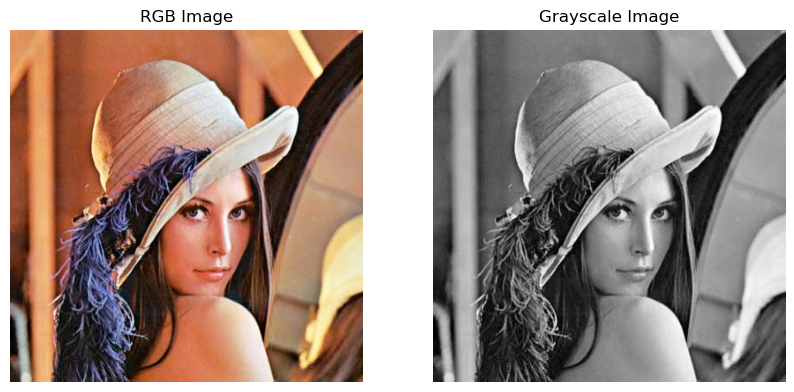

In [ ]:
lenna = cv2.cvtColor(cv2.imread("Lenna.jpg"), cv2.COLOR_BGR2RGB)
r,g,b= lenna[:,:,0],lenna[:,:,1],lenna[:,:,2]
r_const,g_const,b_const=0.2126,0.7152,0.0722
lenna_gray = (r_const*r)+(g_const*g)+(b_const*b)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(lenna)
plt.axis("off")
plt.title('RGB Image')
plt.subplot(122)
plt.imshow(lenna_gray,cmap="grey")
plt.title('Grayscale Image')
plt.axis("off")
plt.show()

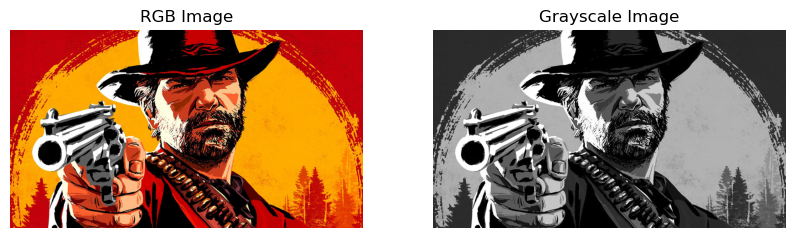

In [ ]:
rdr = imread("rdr.jpg")

r,g,b= rdr[:,:,0],rdr[:,:,1],rdr[:,:,2]
r_const,g_const,b_const=0.2126,0.7152,0.0722

rdr_gray = (r_const*r) + (g_const*g) + (b_const*b)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(rdr)
plt.axis("off")
plt.title('RGB Image')
plt.subplot(122)
plt.imshow(rdr_gray,cmap="grey")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

***Using OpenCV***

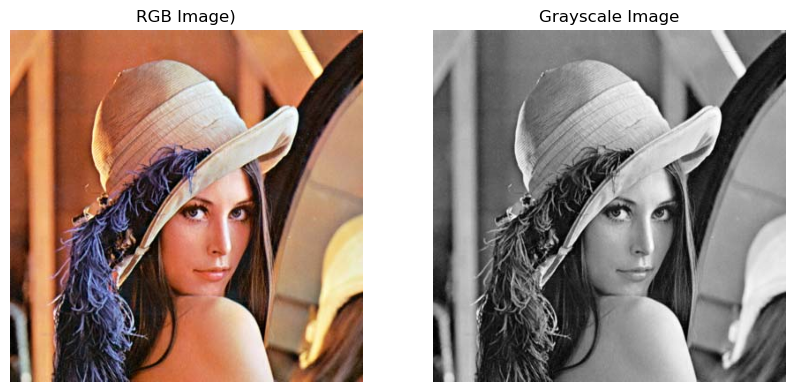

In [ ]:
lenna = cv2.cvtColor(cv2.imread("Lenna.jpg"), cv2.COLOR_BGR2RGB)
lenna_gray =  cv2.cvtColor(lenna, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(lenna)
plt.axis("off")
plt.title("RGB Image)")
plt.subplot(122)
plt.imshow(lenna_gray,cmap="grey")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

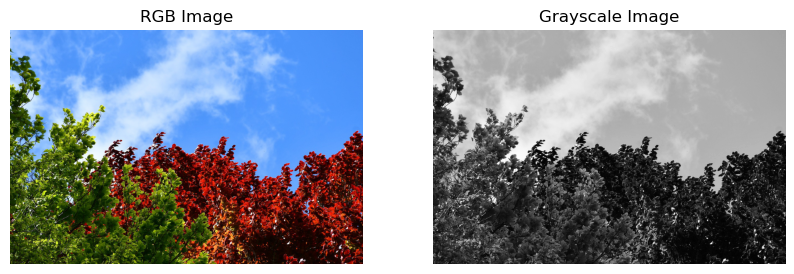

In [ ]:
tree = imread("tree.jpg")
tree_gray =  cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(tree)
plt.axis("off")
plt.title("RGB Image")
plt.subplot(122)
plt.imshow(tree_gray,cmap="grey")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

***HISTOGRAM EQUILIZATION***

***INBUILT - FUNCTION***

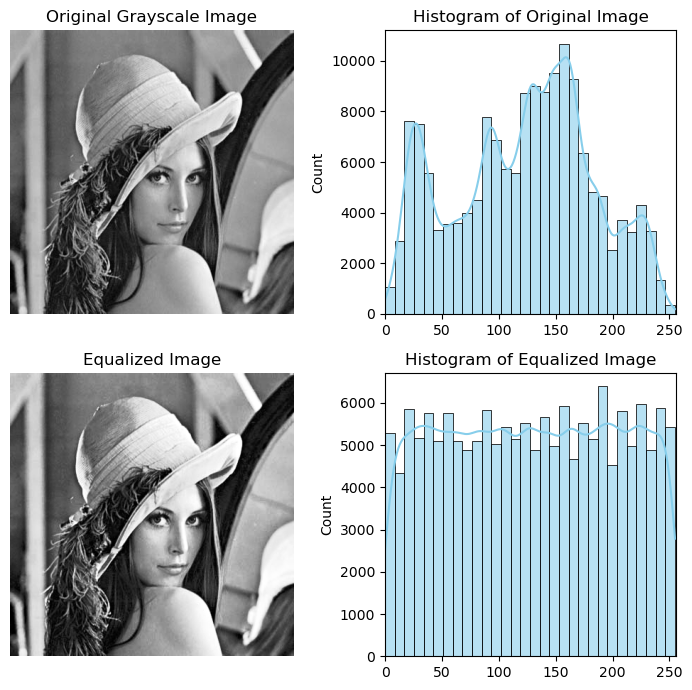

In [ ]:
equ_img = cv2.equalizeHist(lenna_gray)

plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
sns.histplot(lenna_gray.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.imshow(equ_img, cmap='gray')
plt.axis('off')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
sns.histplot(equ_img.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

***MANUAL METHOD***

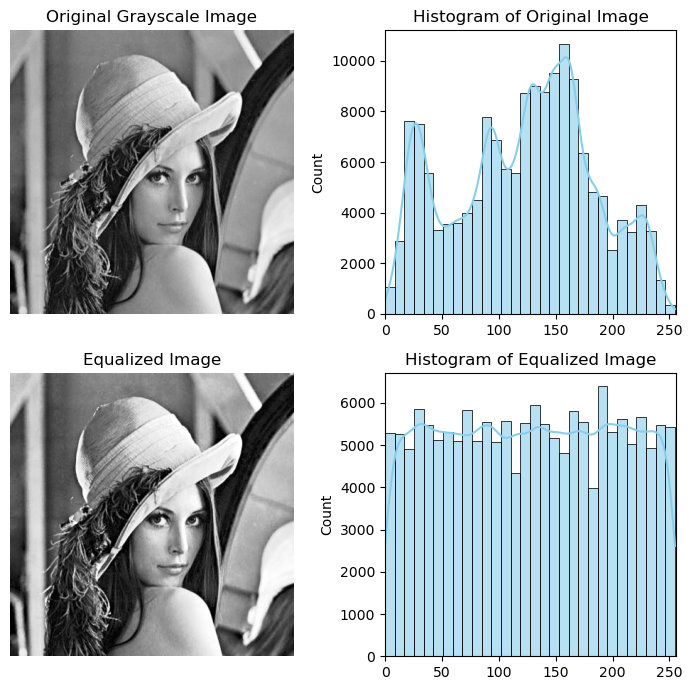

In [ ]:
histogram, bins = np.histogram(lenna_gray.flatten(), bins=256, range=[0, 256])

cdf = histogram.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')

equ_img = cdf_normalized[lenna_gray]
plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
plt.imshow(lenna_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
sns.histplot(lenna_gray.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.imshow(equ_img, cmap='gray')
plt.axis('off')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
sns.histplot(equ_img.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


#### Image resizing

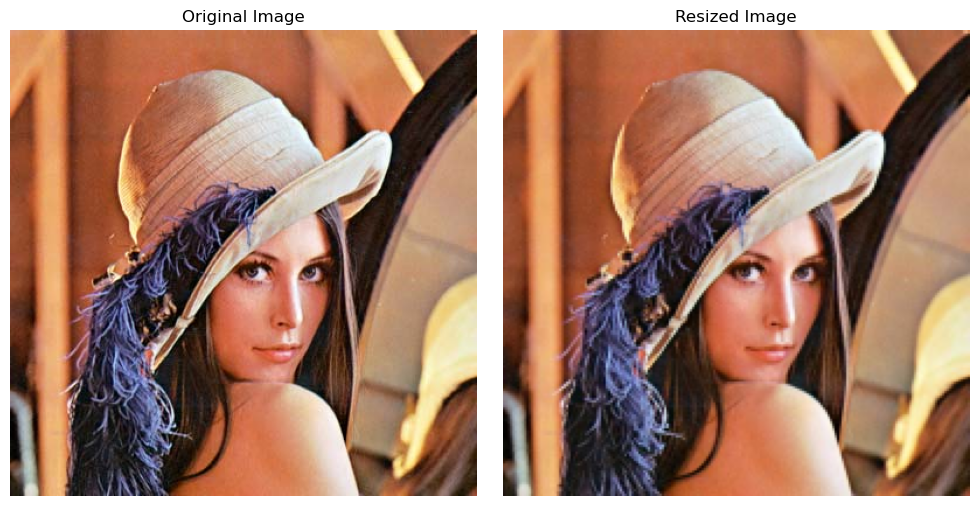

In [ ]:
lenna = cv2.imread("lenna.jpg")
lenna = cv2.cvtColor(lenna,cv2.COLOR_BGR2RGB)

resized = cv2.resize(lenna, (200, 200))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lenna)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resized)
plt.title("Resized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print(f'Image size: {lenna.size}')
print(f'Image shape: {lenna.shape}')
print(f'Resized Image size: {resized.size}')
print(f'Resized Image shape: {resized.shape}')

Image size: 480000
Image shape: (400, 400, 3)
Resized Image size: 120000
Resized Image shape: (200, 200, 3)


***Manual Resizing***

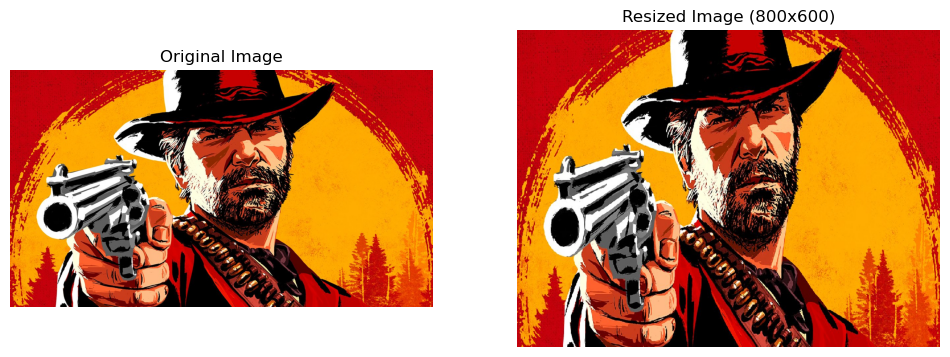

In [ ]:
def resize_image(image, new_width, new_height):
    y_scale, x_scale = image.shape[0] / new_height, image.shape[1] / new_width
    y_indices = (np.arange(new_height) * y_scale).astype(int)
    x_indices = (np.arange(new_width) * x_scale).astype(int)
    resized_image = image[y_indices[:, None], x_indices]
    return resized_image

rdr = cv2.cvtColor(cv2.imread('rdr.jpg'),cv2.COLOR_BGR2RGB)
resized_image = resize_image(rdr, 800, 600)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rdr)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap="gray")
plt.title("Resized Image (800x600)")
plt.axis("off")
plt.show()

In [ ]:
print(f'Image size: {rdr.size}')
print(f'Image shape: {rdr.shape}')
print(f'Resized Image size: {resized_image.size}')
print(f'Resized Image shape: {resized_image.shape}')

Image size: 2764800
Image shape: (720, 1280, 3)
Resized Image size: 1440000
Resized Image shape: (600, 800, 3)
